In [5]:
import pandas as pd
# get feature from csv
# RAW_data = pd.read_csv('data/adult.csv')
# CAT = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
# NUM = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
# LABEL = 'income'
RAW_data = pd.read_csv('data/compass_old.csv')
CAT=['sex','age_cat','race','c_charge_degree','decile_score.1','score_text','v_type_of_assessment','v_decile_score','v_score_text']
NUM=['age','juv_fel_count','juv_misd_count','juv_other_count','priors_count','days_b_screening_arrest','c_days_from_compas','end']
LABEL = 'is_recid'
# convert categorical data to ordinal data
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data_pd = RAW_data.copy()
data_pd[CAT] = enc.fit_transform(RAW_data[CAT])
# data_pd = pd.get_dummies(RAW_data, columns=CAT, dtype=float)
# label to category
data_pd[LABEL] = data_pd[LABEL].astype('category').cat.codes

# realign data to num + cat
data_pd = data_pd[NUM + CAT + [LABEL]]

# normalize numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_pd[NUM] = scaler.fit_transform(data_pd[NUM])

# convert data to tensor
x = data_pd.drop(columns=[LABEL]).values
y = data_pd[LABEL].values.reshape(-1,1)
print(x, y)
data_pd

[[-0.76314171 -0.17116032 -0.1959938  ...  0.          3.
   1.        ]
 [ 0.27773491 -0.17116032 -0.1959938  ...  0.          1.
   1.        ]
 [-0.06922396 -0.17116032 -0.1959938  ...  0.          4.
   2.        ]
 ...
 [-0.32944312 -0.17116032 -0.1959938  ...  0.          1.
   1.        ]
 [-0.93662114 -0.17116032 -0.1959938  ...  0.          3.
   1.        ]
 [-0.93662114 -0.17116032 -0.1959938  ...  0.          3.
   1.        ]] [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,end,sex,age_cat,race,c_charge_degree,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,is_recid
0,-0.763142,-0.17116,-0.195994,-0.249708,-0.769173,-0.067721,-0.155864,0.360236,1.0,0.0,0.0,3.0,3.0,1.0,0.0,3.0,1.0,0
1,0.277735,-0.17116,-0.195994,-0.249708,-0.399623,-0.067721,-0.155864,-1.493342,0.0,0.0,2.0,2.0,4.0,2.0,0.0,1.0,1.0,0
2,-0.069224,-0.17116,-0.195994,-0.249708,-0.030074,-0.744908,0.051069,1.034535,1.0,0.0,2.0,6.0,5.0,2.0,0.0,4.0,2.0,0
3,0.884913,-0.17116,-0.195994,-0.249708,-0.030074,-0.190846,-0.118240,0.366177,0.0,0.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0,0
4,-0.849881,-0.17116,-0.195994,7.344876,-0.584398,-0.350908,-0.069329,1.287026,0.0,2.0,2.0,7.0,3.0,1.0,0.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,-1.110101,-0.17116,-0.195994,-0.249708,-0.769173,-0.067721,-0.155864,1.319701,1.0,2.0,2.0,7.0,5.0,2.0,0.0,6.0,2.0,1
16640,-0.329443,-0.17116,-0.195994,-0.249708,-0.769173,-0.067721,-0.155864,-0.245741,1.0,0.0,0.0,7.0,1.0,1.0,0.0,1.0,1.0,1
16641,-0.329443,-0.17116,-0.195994,-0.249708,-0.769173,-0.067721,-0.155864,0.235476,1.0,0.0,0.0,7.0,1.0,1.0,0.0,1.0,1.0,1
16642,-0.936621,-0.17116,-0.195994,-0.249708,-0.399623,-0.080033,-0.152102,-1.053711,0.0,2.0,3.0,3.0,3.0,1.0,0.0,3.0,1.0,1


In [3]:
print(len(x), len(y))

48842 48842


/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


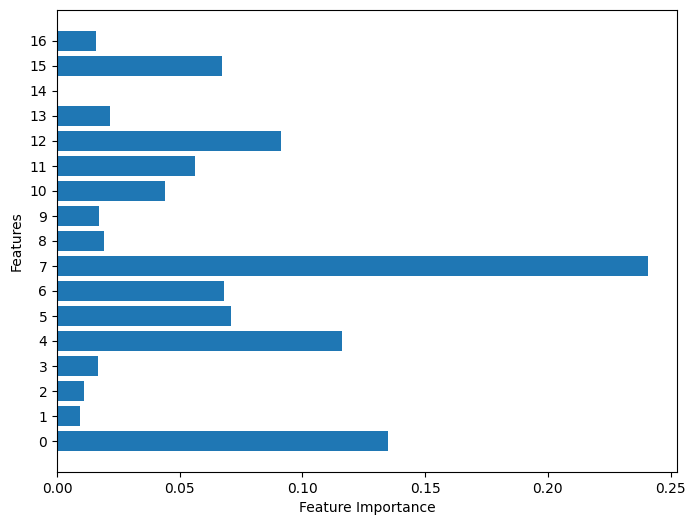

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# 加载数据
# data = pd.read_csv('.csv')

# 初始化随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 拟合模型
rf.fit(x, y)

# 获取特征重要性
feature_importance = rf.feature_importances_

# 可视化特征重要性
plt.figure(figsize=(8, 6))
plt.barh(range(x.shape[1]), feature_importance, align='center')
plt.yticks(range(x.shape[1]))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()